In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_diabetes
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt

# Load datasets
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Standardize the datasets
scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)
X_diabetes = scaler.fit_transform(X_diabetes)

In [2]:
def apply_randomized_projections(X, n_components):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    return rp.fit_transform(X)

def apply_pca(X, n_components):
    pca = PCA(n_components=n_components, random_state=42)
    return pca.fit_transform(X)

def apply_ica(X, n_components):
    ica = FastICA(n_components=n_components, random_state=42)
    return ica.fit_transform(X)

In [3]:
def apply_em(X, y, n_clusters, dataset_name, dr_method):
    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    y_pred = gmm.fit_predict(X)
    
    # Evaluate the clustering
    ari = adjusted_rand_score(y, y_pred)
    silhouette_avg = silhouette_score(X, y_pred)
    
    print(f"EM on {dataset_name} with {dr_method}:")
    print(f"Adjusted Rand Index: {ari:.2f}")
    print(f"Silhouette Score: {silhouette_avg:.2f}\n")
    
    return y_pred, ari, silhouette_avg

def apply_kmeans(X, y, n_clusters, dataset_name, dr_method):
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    # Evaluate the clustering
    ari = adjusted_rand_score(y, y_pred)
    silhouette_avg = silhouette_score(X, y_pred)
    
    print(f"K-Means on {dataset_name} with {dr_method}:")
    print(f"Adjusted Rand Index: {ari:.2f}")
    print(f"Silhouette Score: {silhouette_avg:.2f}\n")
    
    return y_pred, ari, silhouette_avg

In [4]:
# Number of components (for iris, let's keep 2, and for diabetes, let's keep 10)
n_components_iris = 2
n_components_diabetes = 10

# Number of clusters (3 for iris and 2 for diabetes, as an example)
n_clusters_iris = 3
n_clusters_diabetes = 2

# Dimensionality reduction methods
dim_reduction_methods = {
    "Randomized Projections": apply_randomized_projections,
    "PCA": apply_pca,
    "ICA": apply_ica
}

# Datasets
datasets = {
    "Iris": (X_iris, y_iris, n_components_iris, n_clusters_iris),
    "Diabetes": (X_diabetes, y_diabetes, n_components_diabetes, n_clusters_diabetes)
}

results = []

# Apply dimensionality reduction and clustering algorithms
for dr_name, dr_func in dim_reduction_methods.items():
    for dataset_name, (X, y, n_components, n_clusters) in datasets.items():
        X_dr = dr_func(X, n_components)
        
        # Apply EM
        y_pred_em, ari_em, silhouette_em = apply_em(X_dr, y, n_clusters, dataset_name, dr_name)
        results.append((dataset_name, dr_name, "EM", ari_em, silhouette_em))
        
        # Apply K-Means
        y_pred_kmeans, ari_kmeans, silhouette_kmeans = apply_kmeans(X_dr, y, n_clusters, dataset_name, dr_name)
        results.append((dataset_name, dr_name, "K-Means", ari_kmeans, silhouette_kmeans))

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


EM on Iris with Randomized Projections:
Adjusted Rand Index: 0.94
Silhouette Score: 0.68

K-Means on Iris with Randomized Projections:
Adjusted Rand Index: 0.89
Silhouette Score: 0.69

EM on Diabetes with Randomized Projections:
Adjusted Rand Index: 0.00
Silhouette Score: 0.16



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means on Diabetes with Randomized Projections:
Adjusted Rand Index: 0.00
Silhouette Score: 0.31

EM on Iris with PCA:
Adjusted Rand Index: 0.73
Silhouette Score: 0.49



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means on Iris with PCA:
Adjusted Rand Index: 0.62
Silhouette Score: 0.51

EM on Diabetes with PCA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.18



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means on Diabetes with PCA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.24

EM on Iris with ICA:
Adjusted Rand Index: 0.65
Silhouette Score: 0.43



G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means on Iris with ICA:
Adjusted Rand Index: 0.58
Silhouette Score: 0.48



G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


EM on Diabetes with ICA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.09



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means on Diabetes with ICA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.11



G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


EM on Iris with Randomized Projections:
Adjusted Rand Index: 0.94
Silhouette Score: 0.68



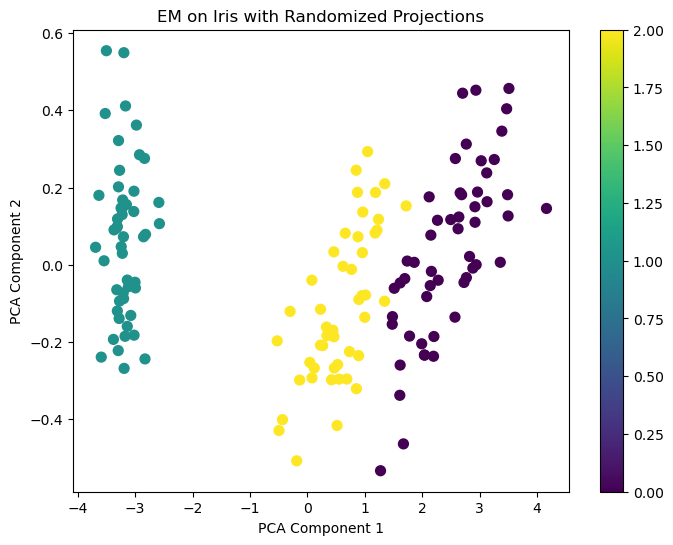

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means on Iris with Randomized Projections:
Adjusted Rand Index: 0.89
Silhouette Score: 0.69



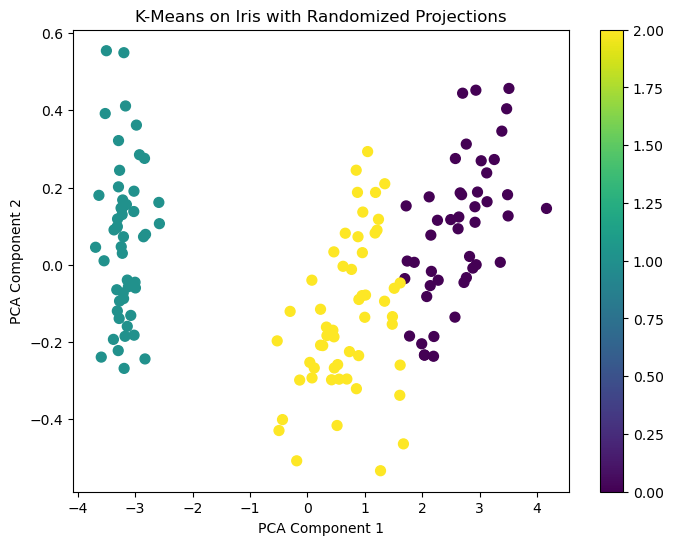

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


EM on Diabetes with Randomized Projections:
Adjusted Rand Index: 0.00
Silhouette Score: 0.16



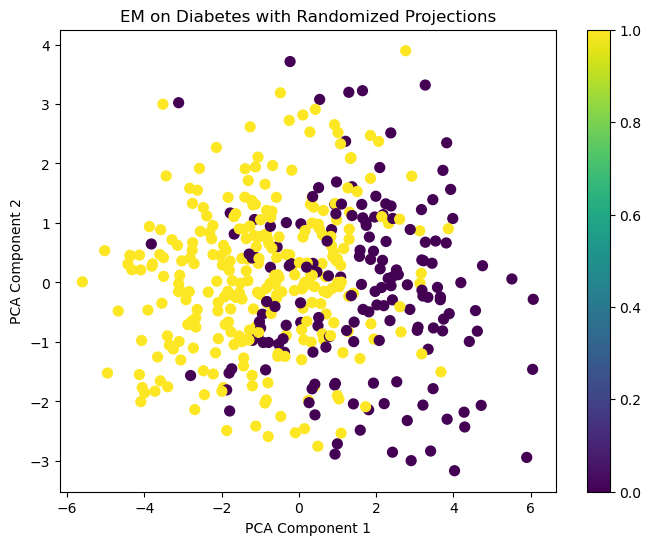

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means on Diabetes with Randomized Projections:
Adjusted Rand Index: 0.00
Silhouette Score: 0.31



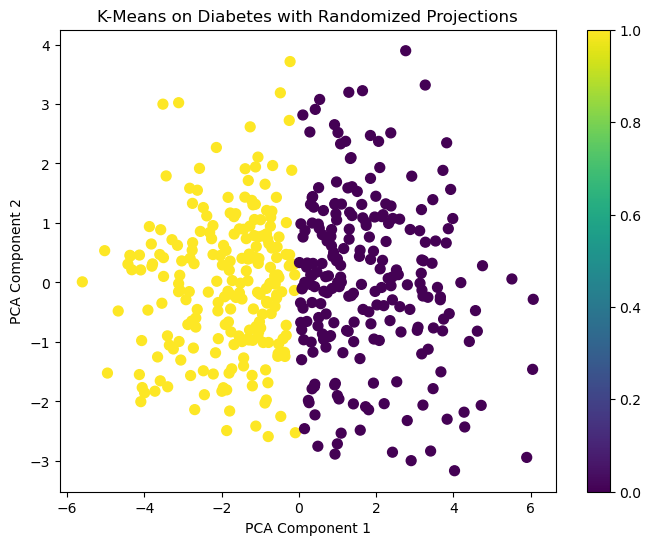

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


EM on Iris with PCA:
Adjusted Rand Index: 0.73
Silhouette Score: 0.49



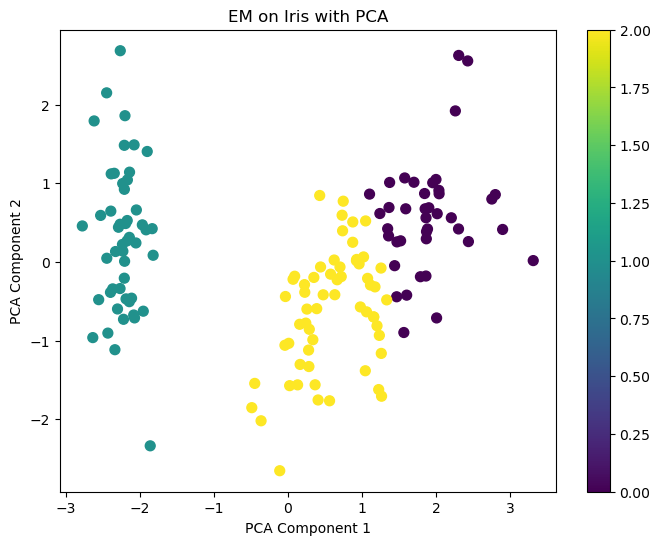

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means on Iris with PCA:
Adjusted Rand Index: 0.62
Silhouette Score: 0.51



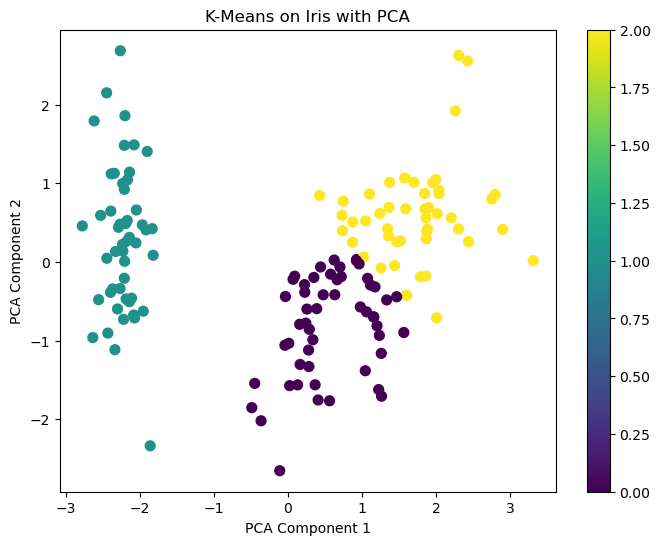

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


EM on Diabetes with PCA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.18



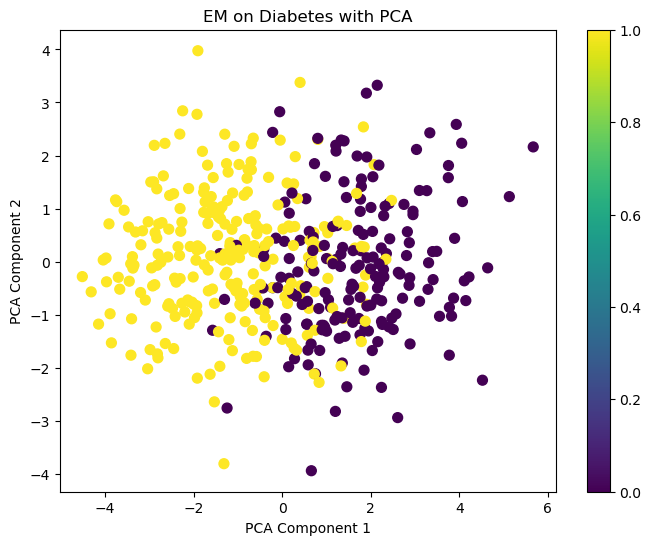

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means on Diabetes with PCA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.24



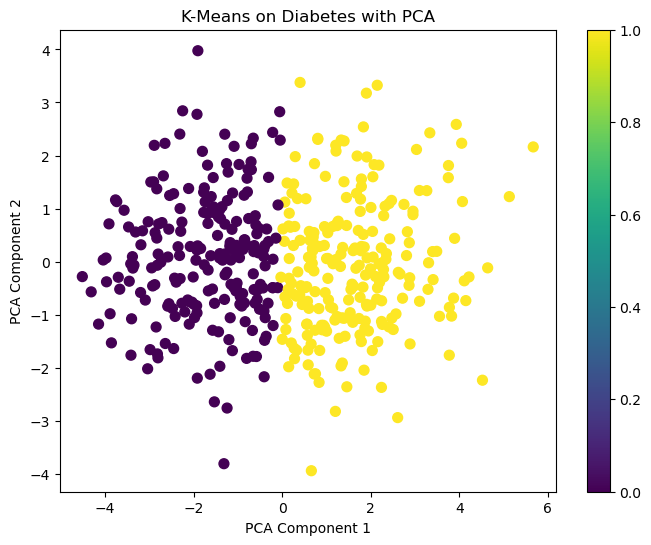

G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


EM on Iris with ICA:
Adjusted Rand Index: 0.65
Silhouette Score: 0.43



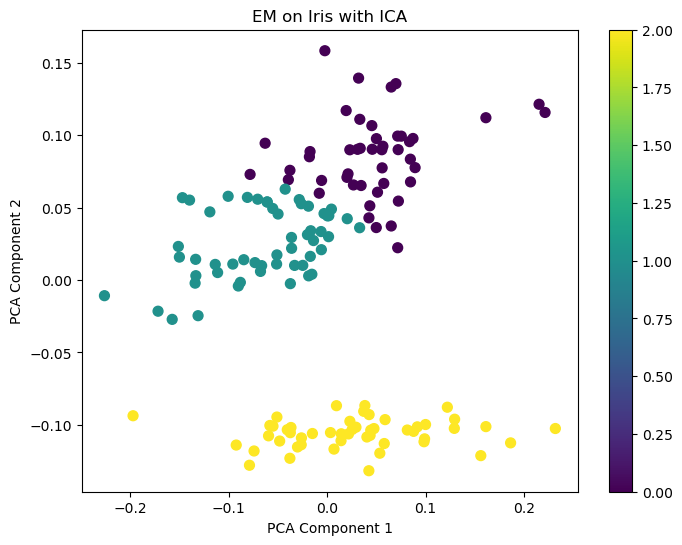

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means on Iris with ICA:
Adjusted Rand Index: 0.58
Silhouette Score: 0.48



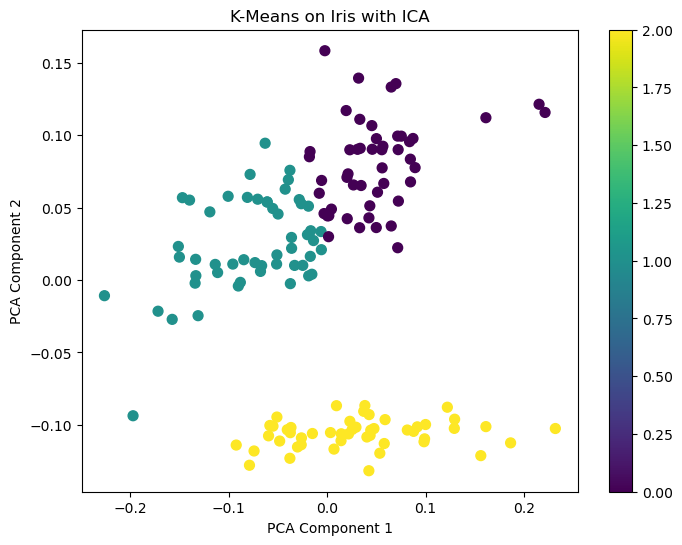

G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


EM on Diabetes with ICA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.09



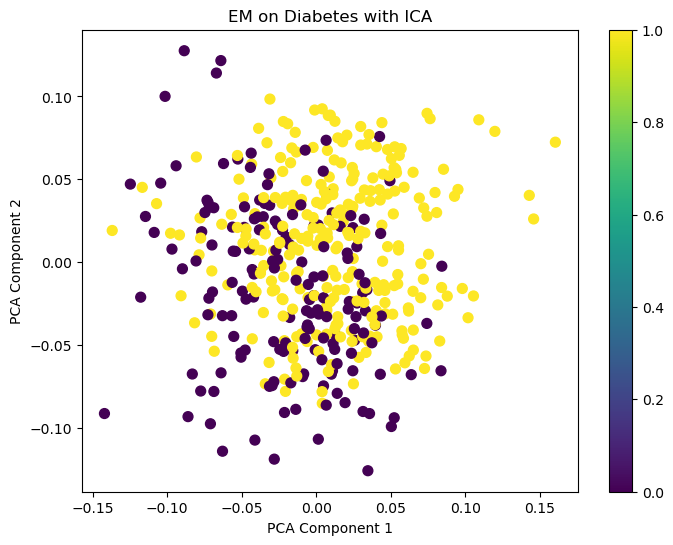

G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means on Diabetes with ICA:
Adjusted Rand Index: 0.00
Silhouette Score: 0.11



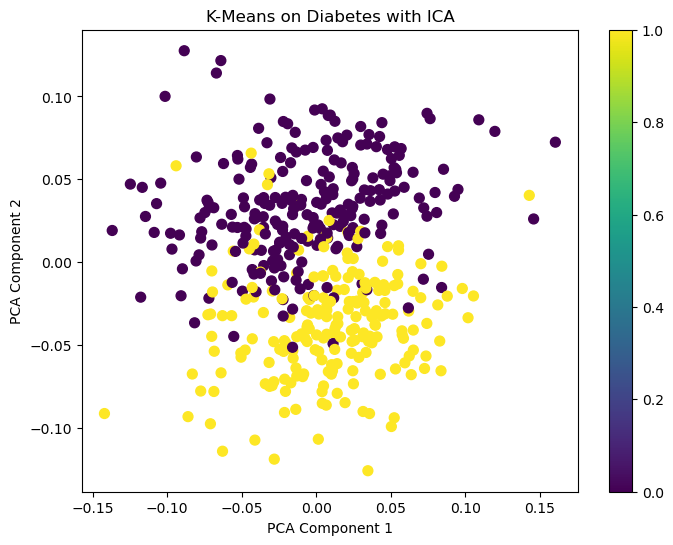

In [5]:
def plot_2d_reduction(X, y, title):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter)
    plt.show()

for dr_name, dr_func in dim_reduction_methods.items():
    for dataset_name, (X, y, n_components, n_clusters) in datasets.items():
        X_dr = dr_func(X, n_components)
        
        # Plot EM results
        y_pred_em, _, _ = apply_em(X_dr, y, n_clusters, dataset_name, dr_name)
        plot_2d_reduction(X_dr, y_pred_em, f"EM on {dataset_name} with {dr_name}")
        
        # Plot K-Means results
        y_pred_kmeans, _, _ = apply_kmeans(X_dr, y, n_clusters, dataset_name, dr_name)
        plot_2d_reduction(X_dr, y_pred_kmeans, f"K-Means on {dataset_name} with {dr_name}")

In [6]:
for dataset_name, dr_name, clustering_method, ari, silhouette in results:
    print(f"{clustering_method} on {dataset_name} with {dr_name}:")
    print(f"  Adjusted Rand Index: {ari:.2f}")
    print(f"  Silhouette Score: {silhouette:.2f}\n")

EM on Iris with Randomized Projections:
  Adjusted Rand Index: 0.94
  Silhouette Score: 0.68

K-Means on Iris with Randomized Projections:
  Adjusted Rand Index: 0.89
  Silhouette Score: 0.69

EM on Diabetes with Randomized Projections:
  Adjusted Rand Index: 0.00
  Silhouette Score: 0.16

K-Means on Diabetes with Randomized Projections:
  Adjusted Rand Index: 0.00
  Silhouette Score: 0.31

EM on Iris with PCA:
  Adjusted Rand Index: 0.73
  Silhouette Score: 0.49

K-Means on Iris with PCA:
  Adjusted Rand Index: 0.62
  Silhouette Score: 0.51

EM on Diabetes with PCA:
  Adjusted Rand Index: 0.00
  Silhouette Score: 0.18

K-Means on Diabetes with PCA:
  Adjusted Rand Index: 0.00
  Silhouette Score: 0.24

EM on Iris with ICA:
  Adjusted Rand Index: 0.65
  Silhouette Score: 0.43

K-Means on Iris with ICA:
  Adjusted Rand Index: 0.58
  Silhouette Score: 0.48

EM on Diabetes with ICA:
  Adjusted Rand Index: 0.00
  Silhouette Score: 0.09

K-Means on Diabetes with ICA:
  Adjusted Rand Index: 0